In [1]:
# EDA 사전 준비사항
%matplotlib inline

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import seaborn as sns  #데이터 시각화 
from sklearn import preprocessing
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},

        style='darkgrid')
from sklearn.cluster import KMeans

import warnings                             
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('/Users/choejeehyuk/경4났조/235583_행동 데이터 분석 인공지능 AI 경진대회_data/train.csv')

In [3]:
df_train = pd.DataFrame(train.game_id.unique(), columns=['game_id'])
df_train.index = df_train.game_id
df_train = df_train.drop(['game_id'], axis = 1)
print(df_train)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[38872 rows x 0 columns]


In [5]:
df_train.head()

""
game_id
0
1
2
3
4


In [6]:
# 처음 기록 된 카메라 좌표를 기록

df_train_p0 = train[(train.event=='Camera')&(train.player==0)]
print(df_train_p0)
df_train_p0 = df_train_p0[df_train_p0.shift(1).game_id!=df_train_p0.game_id] # 쉬프트를 이용하여 각 게임의 첫번째 데이터 찾기
print(df_train_p0)
df_train_p0 = df_train_p0.iloc[:, [0,6]].rename({'event_contents':'player0_starting'}, axis = 1)
print(df_train_p0)
df_train_p0.index = df_train_p0['game_id']
print(df_train_p0)
df_train_p0 = df_train_p0.drop(['game_id'], axis=1)
print(df_train_p0)
df_train = pd.merge(df_train, df_train_p0, on='game_id', how='left')
del df_train_p0

          game_id  winner  time  player species   event  \
0               0       1  0.00       0       T  Camera   
4               0       1  0.14       0       T  Camera   
5               0       1  0.14       0       T  Camera   
6               0       1  0.14       0       T  Camera   
7               0       1  0.14       0       T  Camera   
...           ...     ...   ...     ...     ...     ...   
67091763    38871       0  8.50       0       Z  Camera   
67091764    38871       0  8.50       0       Z  Camera   
67091771    38871       0  8.51       0       Z  Camera   
67091773    38871       0  8.52       0       Z  Camera   
67091774    38871       0  8.52       0       Z  Camera   

                          event_contents  
0                at (145.25, 21.5078125)  
4         at (142.99609375, 24.50390625)  
5          at (142.5078125, 24.98828125)  
6           at (139.6171875, 27.8828125)  
7           at (138.3359375, 29.1640625)  
...                              

In [7]:
df_train_p1 = train[(train.event=='Camera')&(train.player==1)]
df_train_p1 = df_train_p1[df_train_p1.shift(1).game_id!=df_train_p1.game_id]
df_train_p1 = df_train_p1.iloc[:, [0,6]].rename({'event_contents':'player1_starting'}, axis = 1)
df_train_p1.index = df_train_p1['game_id']
df_train_p1 = df_train_p1.drop(['game_id'], axis=1)
df_train = pd.merge(df_train, df_train_p1, on='game_id', how='left')
del df_train_p1

In [8]:
df_train.head()

,player0_starting,player1_starting
game_id,,
0,"at (145.25, 21.5078125)","at (22.75, 147.0078125)"
1,"at (140.0, 162.0078125)","at (28.0, 18.5078125)"
2,"at (151.25, 20.5078125)","at (24.75, 128.0078125)"
3,"at (127.25, 27.5078125)","at (24.75, 137.0078125)"
4,"at (36.75, 122.0078125)","at (163.25, 18.5078125)"


In [9]:
# x, y 값으로 분리

df_train['player0_starting'] = df_train.player0_starting.str.split('(').str[1]
df_train['player0_starting'] = df_train.player0_starting.str.split(')').str[0]
split_xy = df_train.player0_starting.str.split(',')
df_train['player0_x'] = split_xy.str[0].astype('float')
df_train['player0_y'] = split_xy.str[1].astype('float')
del split_xy

df_train['player1_starting'] = df_train.player1_starting.str.split('(').str[1]
df_train['player1_starting'] = df_train.player1_starting.str.split(')').str[0]
split_xy = df_train.player1_starting.str.split(',')
df_train['player1_x'] = split_xy.str[0].astype('float')
df_train['player1_y'] = split_xy.str[1].astype('float')
del split_xy

In [1]:
df_train.head()

NameError: name 'df_train' is not defined

In [10]:
location_p0 = df_train.loc[:, ['player0_x', 'player0_y']]
location_p0 = location_p0.rename({'player0_x':'location_x', 'player0_y':'location_y'}, axis=1)

location_p1 = df_train.loc[:, ['player1_x', 'player1_y']]
location_p1 = location_p1.rename({'player1_x':'location_x', 'player1_y':'location_y'}, axis=1)
location_p1.index += location_p0.index[-1]+1

location = pd.concat([location_p0, location_p1])
location = location.dropna()
del location_p0, location_p1

In [11]:
location.head()

,location_x,location_y
game_id,,
0,145.25,21.507812
1,140.00,162.007812
2,151.25,20.507812
3,127.25,27.507812
4,36.75,122.007812


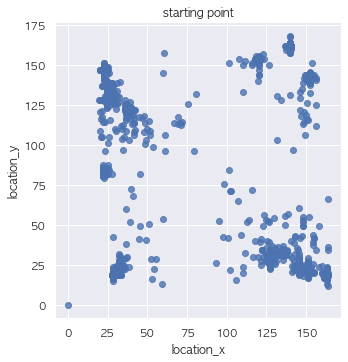

In [12]:
# 모든 포인트 시각화
sns.lmplot('location_x', 'location_y', data = location, fit_reg=False)
plt.title('starting point')
plt.show()

In [13]:
# 스타팅 컬럼을 카운팅을 해보면 15개의 포이트가 많음
# 15개의 스타팅포인트 존재
df_train.player0_starting.value_counts().head(20)

24.75, 128.0078125          3123
22.75, 147.0078125          3084
145.25, 21.5078125          3072
151.25, 20.5078125          3055
152.25, 142.0078125         2716
31.75, 22.5078125           2666
24.75, 137.0078125          2612
127.25, 27.5078125          2585
163.25, 18.5078125          2446
28.0, 18.5078125            2412
140.0, 162.0078125          2355
36.75, 122.0078125          2290
135.25, 31.5078125          1225
22.25, 81.5078125           1207
120.25, 153.83984375        1202
36.74609375, 122.0078125     247
145.25, 21.51171875           64
24.75, 128.01171875           60
163.25, 18.51171875           59
28.0, 18.51171875             58
Name: player0_starting, dtype: int64

In [14]:
# kmeans를 이용하여 15개로 클러스터링
kmeans_clst = KMeans(n_clusters=15).fit(location)
location['starting'] = kmeans_clst.labels_+1

In [15]:
location.head()

,location_x,location_y,starting
game_id,,,
0,145.25,21.507812,6
1,140.00,162.007812,3
2,151.25,20.507812,14
3,127.25,27.507812,13
4,36.75,122.007812,1


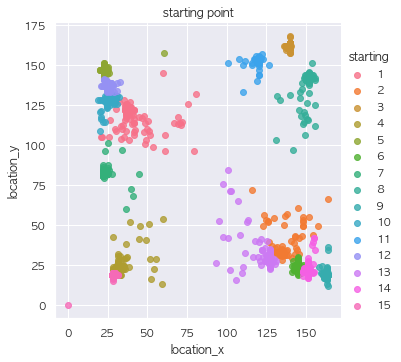

In [16]:
# 클러스트링한 결과를 시각화
sns.lmplot('location_x', 'location_y', data = location, fit_reg=False, hue="starting")
plt.title('starting point')
plt.show()

# 초반 진행 화면이 누락 된 게임은 엉뚱하게 분류 됨

In [17]:
# kmeans로 찾은 15개의 포인트에서 각 데이터들의 거리 계산
for cluster in range(15):
    point = location[location.starting==cluster+1]
    loc = point.loc[:,['location_x', 'location_y']]
    del point
    loc['center_x'] = kmeans_clst.cluster_centers_[cluster][0]
    loc['center_y'] = kmeans_clst.cluster_centers_[cluster][1]
    distance = np.sqrt(np. square(loc.location_x - loc.center_x) + np.square(loc.location_y - loc.center_y))
    location.loc[loc.index, 'distance'] = distance
    del loc

In [18]:
location.head()

,location_x,location_y,starting,distance
game_id,,,,
0,145.25,21.507812,6,0.030681
1,140.00,162.007812,3,0.022329
2,151.25,20.507812,14,0.042568
3,127.25,27.507812,13,0.142016
4,36.75,122.007812,1,0.141918


In [19]:
# 일정 거리(5)이상 떨어진 데이터는 starting을 0으로 지정
idx = location[location.distance>5].index
location.loc[idx, 'starting'] = 0
del idx


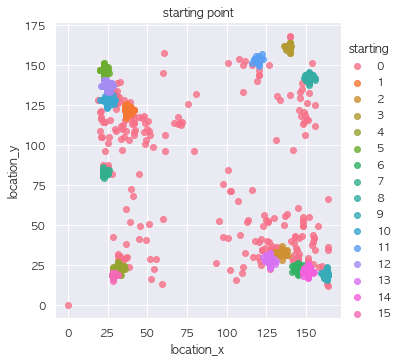

In [20]:
# 시각화를 통해 스타팅을 모르는 게임은 분홍색(0)으로 나타며 15개의 스타팅 포인트를 확인 할 수 있음.
sns.lmplot('location_x', 'location_y', data = location, fit_reg=False, hue="starting")
plt.title('starting point')
plt.show()

In [25]:
# 6개의 2인용 맵과 1개의 3인용 맵이 존재

# TMI: 스타크래프트2 공허의유산 래더에서 3인용 맵이 쓰인적은 '까탈레나' 딱 한 번.
# 이를 통해 2017년 7월20일 ~ 2017년 11월16일 사이에 진행 된 게임 정보라는 것을 알 수 있음.
# 나머지 6개의 맵은 '어비설리프', '어센션투아이어', '애컬라이트', '인터로퍼', '오딧세이', '메크디포'
# 근데 결과 예측하는데 맵 이름 상관 없음